# Minimum Window Substring

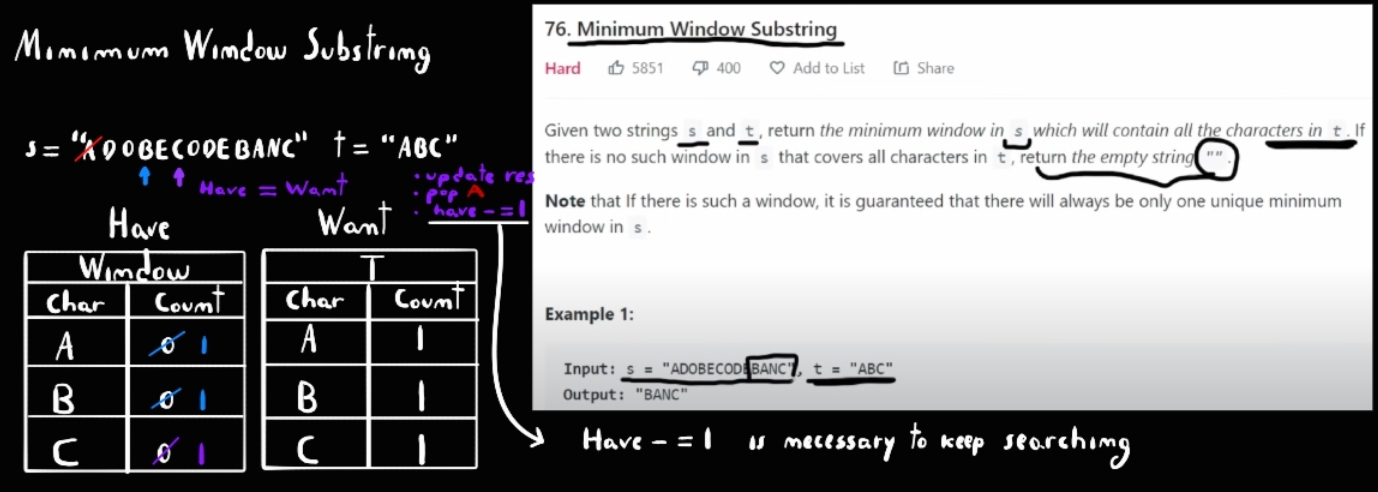

In [2]:
class Solution:
    def min_window_substring(self, s: str, t: str) -> str:
        res, res_len = "", float("infinity")
        l = 0
        window_map, t_map = {}, {}
        for c in t:
            t_map[c] = 1 + t_map.get(c, 0)
        have, want = 0, len(t_map)
        for r in range(len(s)):
            window_map[s[r]] = 1 + window_map.get(s[r], 0)
            if s[r] in t_map and window_map[s[r]] == t_map[s[r]]:
                have += 1
            while have == want:
                if (r - l + 1) < res_len:
                    res, res_len = s[l : r + 1], r - l + 1
                window_map[s[l]] -= 1
                if s[l] in t_map and window_map[s[l]] < t_map[s[l]]:
                    have -= 1
                l += 1
        return res


sol = Solution()
sol.min_window_substring("ADOBECODEBANC", "ABC")

'BANC'

# Sliding Window Maximum

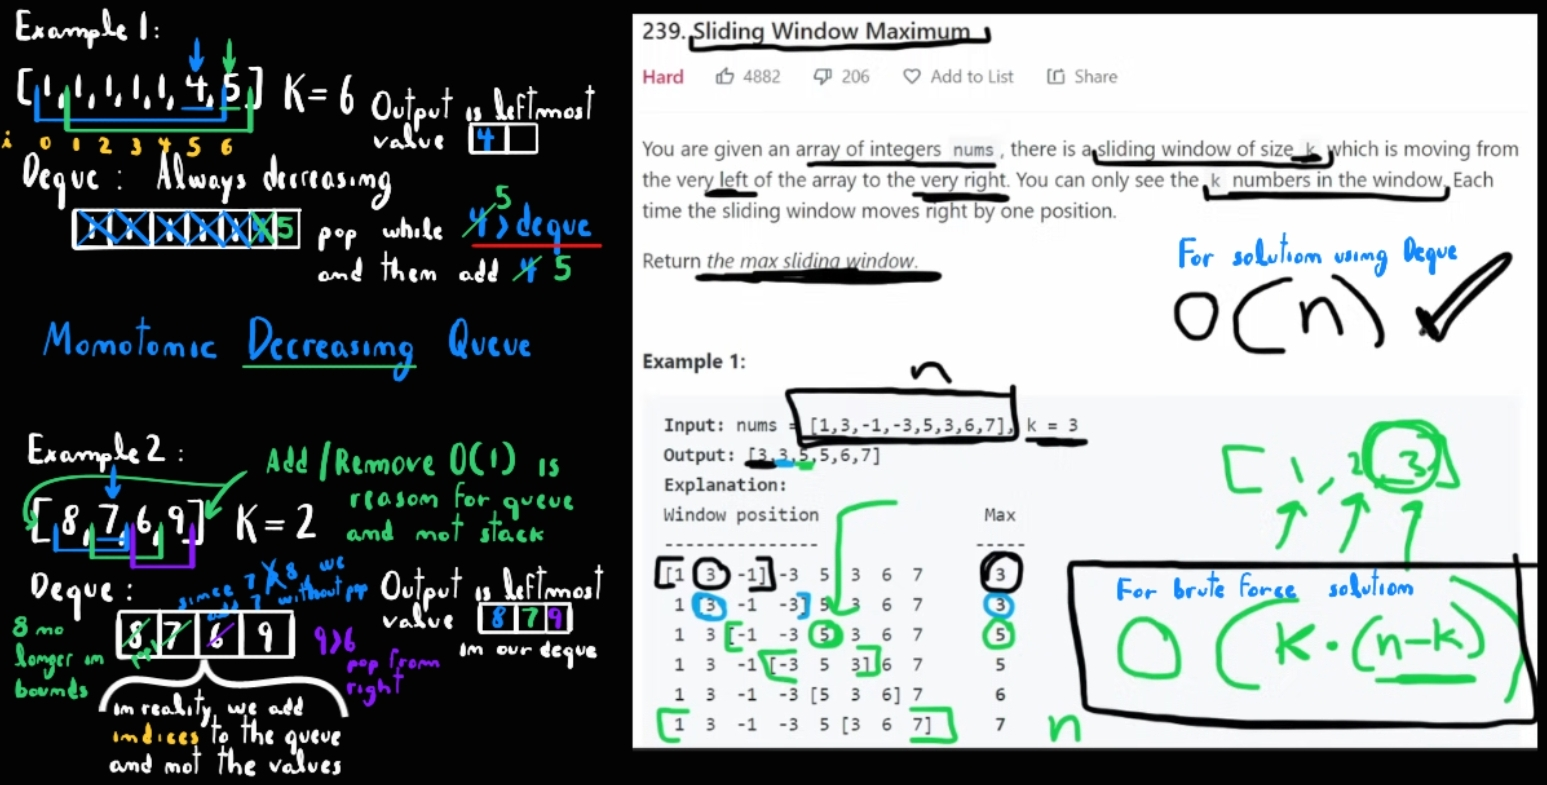

In [20]:
from collections import deque
from typing import List


class Solution:
    def max_sliding_window(self, nums: List[int], k: int) -> List[int]:
        output = []
        q = deque()
        l = 0
        for r in range(len(nums)):
            while q and nums[r] > nums[q[-1]]:
                q.pop()
            q.append(r)
            while q[0] < r - k + 1:
                q.popleft()
                l += 1
            if r >= k - 1:
                output.append(nums[q[0]])
        return output


sol = Solution()
sol.max_sliding_window([3, 1, 2, 4, 3], 2)

[3, 2, 4, 4]